In [ ]:
!pip install yfinance

In [ ]:
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

# 1) Obtendo dados de alguma empresa com ações listadas no YahooFinance

## 1.1) Exemplo com a Petrobrás

In [ ]:
tickers = ['PETR3.SA']
df1 = yf.download(tickers, start='2020-12-1',end='2020-12-16')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df1.to_csv('df.csv')

In [ ]:
df = pd.read_csv('df.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-01,25.980000,26.400000,25.920000,26.299999,26.299999,12790700
1,2020-12-02,26.290001,27.240000,26.030001,26.660000,26.660000,16340300
2,2020-12-03,26.870001,27.639999,26.690001,27.200001,27.200001,14481900
3,2020-12-04,27.709999,28.290001,27.700001,28.100000,28.100000,10531000
4,2020-12-07,28.000000,28.230000,27.260000,27.469999,27.469999,14894400
5,2020-12-08,27.320000,27.740000,27.150000,27.230000,27.230000,8495000
6,2020-12-09,27.230000,27.520000,26.959999,27.260000,27.260000,18354800
7,2020-12-10,27.480000,28.719999,27.410000,28.250000,28.250000,21953100
8,2020-12-11,28.059999,28.200001,27.680000,27.780001,27.780001,8410500
9,2020-12-14,28.459999,28.570000,27.799999,27.889999,27.889999,15227000


# 2) Separando os dados para preparar os modelos

In [ ]:
actual_price = df.tail(1) # ultimo preço observado
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
10,2020-12-15,27.889999,28.42,27.860001,28.25,28.25,11595600


In [ ]:
df= df.head(len(df)-1) # pego o restante dos dados
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-01,25.980000,26.400000,25.920000,26.299999,26.299999,12790700
1,2020-12-02,26.290001,27.240000,26.030001,26.660000,26.660000,16340300
2,2020-12-03,26.870001,27.639999,26.690001,27.200001,27.200001,14481900
3,2020-12-04,27.709999,28.290001,27.700001,28.100000,28.100000,10531000
4,2020-12-07,28.000000,28.230000,27.260000,27.469999,27.469999,14894400
5,2020-12-08,27.320000,27.740000,27.150000,27.230000,27.230000,8495000
6,2020-12-09,27.230000,27.520000,26.959999,27.260000,27.260000,18354800
7,2020-12-10,27.480000,28.719999,27.410000,28.250000,28.250000,21953100
8,2020-12-11,28.059999,28.200001,27.680000,27.780001,27.780001,8410500
9,2020-12-14,28.459999,28.570000,27.799999,27.889999,27.889999,15227000


In [ ]:
days = list() # crio duas listas vazia
adj_close_prices = list()

In [ ]:
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']

In [ ]:
for day in df_days: # cria um dataset de datas independente
  days.append([int(day.split('-')[2])]) # ele vai ter só o numero do dia
for adj_close_price in df_adj_close: # lista com os preços respectivos
  adj_close_prices.append(float(adj_close_price))

In [ ]:
days

[[1], [2], [3], [4], [7], [8], [9], [10], [11], [14]]

# 3) Os três modelos

## 3.1) Criando

In [ ]:
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days, adj_close_prices)

poly_svr = SVR(kernel='poly', C=1000.0, degree=2)
poly_svr.fit(days, adj_close_prices)

rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.85)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.85,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## 3.2) Plotando

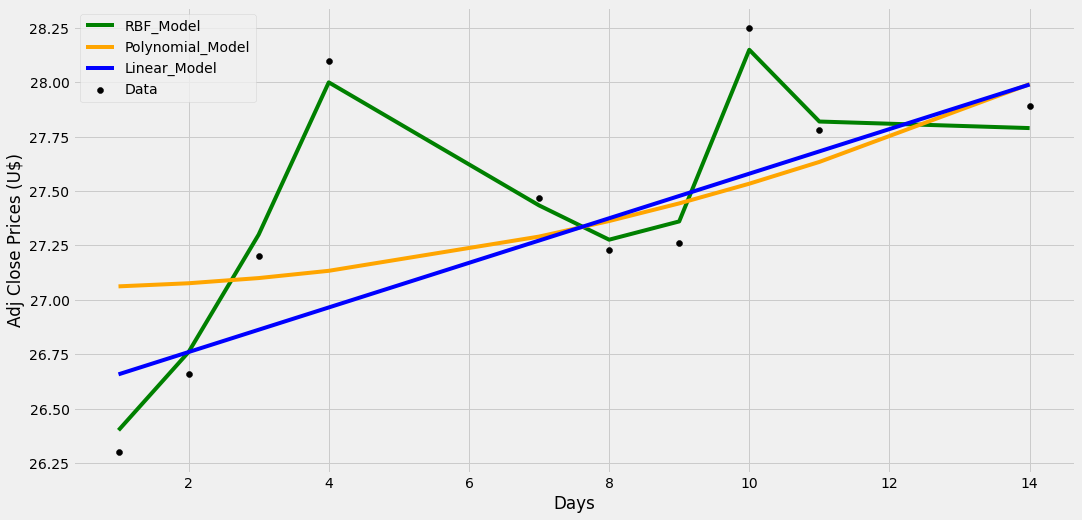

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'black', label = 'Data') # valores reais em preto
plt.plot(days, rbf_svr.predict(days), color = 'green', label = 'RBF_Model') # modelo que melhor se adequou aos dados
plt.plot(days, poly_svr.predict(days), color = 'orange', label = 'Polynomial_Model')
plt.plot(days, lin_svr.predict(days), color = 'blue', label = 'Linear_Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Prices (U$)')
plt.legend()
plt.show()

# 4) Mostrando os preços para um dado dia

In [ ]:
day = [[20]]
print('The RBF SVR predicted price:', rbf_svr.predict(day))
print('The Liner SVR predicted price:', lin_svr.predict(day))
print('The Polynomial SVR predicted price:', poly_svr.predict(day))

The RBF SVR predicted price: [27.44934894]
The Liner SVR predicted price: [28.60499916]
The Polynomial SVR predicted price: [28.96426343]


In [ ]:
print('The actual price:', actual_price['Adj Close'][10]) # novamente, o modelo que parece melhor projetar um valor real é o RBF

The actual price: 28.25
